## Natural Language Processing in Python

In this tutorial, we are going to explore how to analyze large bodies of text using Natural Language Processing (NLP). With NLP, we can get completely different perspectives on textual data that simply aren't possible using traditional close reading methods. 

We are going to work with a variety of Python library (mainly [``nltk`` (Natural Language Toolkit)](https://www.nltk.org/) and ``spacy``), which contain a variety of scripts to work with data containing human language. Let's start by importing the necessary libraries.

In [4]:
import re
import nltk
from nltk import *
import numpy as np
import os
import pandas as pd

In [5]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bge_j\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bge_j\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bge_j\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### From text to tokens
A computer does not read a text like a human would.  To process a collection of texts on a computational level, we need to approach our text in a different way. This is often called _distant reading_.

Our first step will be to split our text up into individual tokens. Instead of full bodies of text, we are going to work with our texts on a different scale. By splitting up the texts into individual words (or sentences), we are able to run computations on the word frequencies. 

Let's start by tokenizing the sentence below:

In [8]:
myText = "It's summer time! Time to go outside! Well, first we have to finish today's workshops, of course. Take your time."
word_tokenize(myText)

['It',
 "'s",
 'summer',
 'time',
 '!',
 'Time',
 'to',
 'go',
 'outside',
 '!',
 'Well',
 ',',
 'first',
 'we',
 'have',
 'to',
 'finish',
 'today',
 "'s",
 'workshops',
 ',',
 'of',
 'course',
 '.',
 'Take',
 'your',
 'time',
 '.']

Now, let's tokenize on a different level. What's the difference?

In [11]:
sent_tokenize(myText)

["It's summer time!",
 'Time to go outside!',
 "Well, first we have to finish today's workshops, of course.",
 'Take your time.']

It is most common in NLP to work on a word level, as this allows for more fine-grained analyses. We'll stick to that for this tutorial.

#### Word frequency

Doing a word frequency analysis is a basic way of getting to know the contents of a text. It shows you which words are most common across the document.

Let's start by getting the the word frequency for a large text. Go to the website for **[Project Gutenberg](https://www.gutenberg.org/)** and download a book to your liking. Make sure that you download it in .txt format. Save the file in a convient location.

> **Exercise:** Before importing your book, we need to make sure if the text file is cleaned. Open the text file in a text editor and clean it, so that only the contents of the book itself are included.

In [16]:
# Change the name and location to those of your own text file.
with open(r'C:\Users\bge_j\Documents\UDS\Summer school 2024\Materials\04_text_analysis\novel.txt', 'r',  encoding='utf-8') as file:
    myBook = file.read()
    myBook = ' '.join(myBook.split())

print(myBook)

﻿ MR. BENNETT AND MRS. BROWN VIRGINIA WOOLF PUBLISHED BY LEONARD AND VIRGINIA WOOLF AT THE HOGARTH PRESS TAVISTOCK SQUARE LONDON W.C.I 1924 MR. BENNETT AND MRS. BROWN[1] It seems to me possible, perhaps desirable, that I may be the only person in this room who has committed the folly of writing, trying to write, or failing to write, a novel. And when I asked myself, as your invitation to speak to you about modern fiction made me ask myself, what demon whispered in my ear and urged me to my doom, a little figure rose before me--the figure of a man, or of a woman, who said, "My name is Brown. Catch me if you can." Most novelists have the same experience. Some Brown, Smith, or Jones comes before them and says in the most seductive and charming way in the world, "Come and catch me if you can." And so, led on by this will-o'-the-wisp, they flounder through volume after volume, spending the best years of their lives in the pursuit, and receiving for the most part very little cash in exchange

> **Exercise:** There's a part in our script above that's a little tricky: `myBook = ' '.join(myBook.split())`. Try to deconstruct this line and note down what it does.


In [19]:
# Your code here:


Now that we have imported a clean text, let's see what the most common words in the text are.

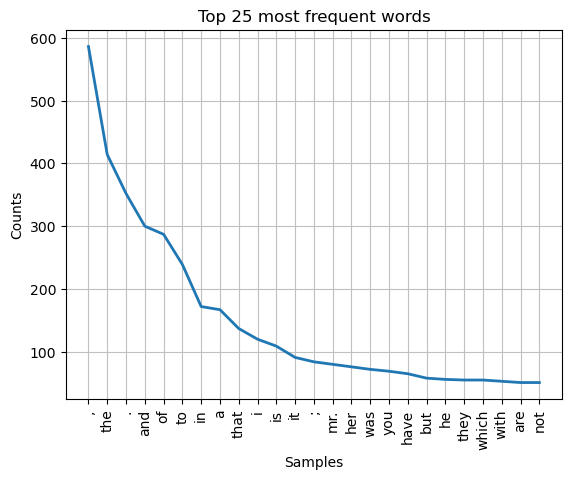

<Axes: title={'center': 'Top 25 most frequent words'}, xlabel='Samples', ylabel='Counts'>

In [22]:
myTokens = word_tokenize(myBook)
wordFrequency = FreqDist(token.lower() for token in myTokens)

wordFrequency.plot(25, title='Top 25 most frequent words')

It's a start, but this is not very telling, is it? There's still a lot of noise in our tokens - interpunction, but especially words that are not informative (the, he, of, and, a, etc.). Let's clean it up.

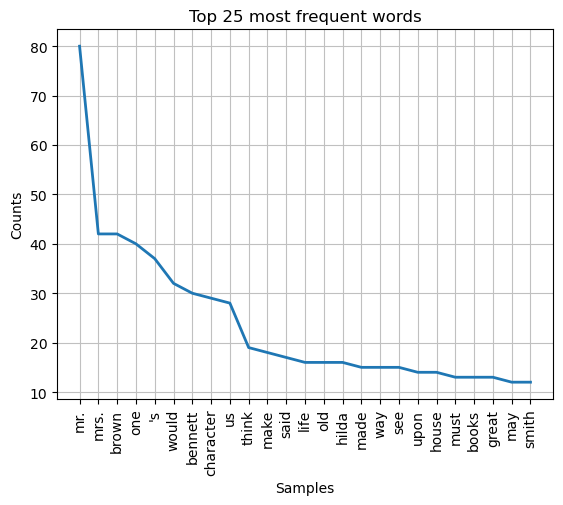

<Axes: title={'center': 'Top 25 most frequent words'}, xlabel='Samples', ylabel='Counts'>

In [25]:
from nltk.corpus import stopwords

# First, we lower our tokens. Then we filter out the ones in our stopwords list. Finally, we remove every token that is not a word.
filteredTokens = [word for word in myTokens if word.lower() not in stopwords.words('english') and re.sub(r'[^\w\s]','',word)]

# Plot the results. This code is the same as above, but now using our filteredTokens object.
wordFrequency = FreqDist(token.lower() for token in filteredTokens)
wordFrequency.plot(25, title='Top 25 most frequent words')

That looks more like it! 

We used a collection of English stopwords from NLTK to remove words that are very common and thus not informative. We can see what's in this list by printing its contents. 

> **Exercise:** Print the contents of the stopwords list we used in the script above. 

In [28]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Sometimes you want to add more words to your stopwords list. For example, in my novel the tokens "said", "would" and "'s" are very common. We can add these to our list of stopwords.

> **Exercise:** Add a few more words to the stopwords list and save the result to a new list called `myStopwords`. Create a new word frequency plot using your own stopwords list.

In [31]:
# Your code here:


There is a part of the above code that might look a little daunting at first. Let's isolate this part to see what it does:

In [34]:
re.sub(r'[^\w\s]','','Hey dear reader... This is my sample text!!!! :)')

'Hey dear reader This is my sample text '

After running the function, all punctuation is removed from the text. But why? What does `r'[^\w\s]'` do? Time to learn about...

#### Regular expressions
This is what is known as a **regular expression** (also often called **regex**). Regex is a way of creating complex patterns to find parts of text using rules. Regex can be hard to read, but there are a lot of useful resources to learn its syntax. We recommend [RegExr](https://regexr.com/). This website allows you to paste your own text, write a regex pattern and immediately what parts of your text it matches with. It also includes a handy cheat sheet.

Let's take the above regex expression as an example and deconstruct it: `r'[^\w\s]'`.

- `r`: this isn't part of the regular expression, but it is important. By including **r** in front of a string, Python will parse the text *as is*. This includes backslashes `\`, which normally serve a different function in a regex (long story, read more about that [here](https://docs.python.org/3/library/re.html)).
- `[]`: a group of characters. For example, `[a-f]` matches all letters from a to f.
- `^`: negation, meaning that the regex will match everything that is **not** stated in the set.
- `\w`: matches all words.
- `\s`: matches all whitespaces (spaces, newlines, tabs).

Put together, this regex pattern matches all parts of the text that are **not** words or whitespaces. This is an effective way of cleaning all interpunction from our text.

As you might see, regex aren't very intuitive at first. Luckily, many people have published their regex patterns online. If you are looking for a specific pattern, try searching on StackOverflow or using an AI assistant, such as ChatGPT. By learning how other build their patterns, you'll start to gain an understanding of how to create your own.

#### Keyword in context (concordance view)

After running our word frequency analysis, we have a broad overview of the most important words in our text. The context is missing, however. To see how these words are used in the document we can use a concordance view, which shows a keyword in its original context. Try searching for keywords with the script below and see what you can find.

In [38]:
nltk_text = Text(myTokens)

# Find the concordance of a word
nltk_text.concordance('me')

Displaying 22 of 22 matches:
NETT AND MRS. BROWN [ 1 ] It seems to me possible , perhaps desirable , that I
peak to you about modern fiction made me ask myself , what demon whispered in 
t demon whispered in my ear and urged me to my doom , a little figure rose bef
my doom , a little figure rose before me -- the figure of a man , or of a woma
ho said , `` My name is Brown . Catch me if you can . '' Most novelists have t
 way in the world , `` Come and catch me if you can . '' And so , led on by th
ue that fail they do . This will lead me , I am well aware , to make some very
le egotism , I will ask you to excuse me . I do not want to attribute to the w
w in writing . So , if you will allow me , instead of analysing and abstractin
the window , and looking furtively at me as he did do . It was plain , from Mr
 and inconsequently , `` Can you tell me if an oak-tree dies when the leaves h
al to Mr. Bennett and quite unreal to me . For instance , in this article he s
_Sherlock Holmes_ is re

Concordance view is useful for doing qualitative analysis. It allows you to get an overview of the different contexts in which a term is used within your corpus.

#### Term Frequency - Inverse Document Frequency (tf-idf)

Next, let's go beyond simple word counts. We are going to work with a more advanced metric: **tf-idf**. This metric builds on the foundation of the word frequency we calculated earlier, but places it in the context of a larger corpus of texts. tf-idf is used to calculate how common a word is in the target document compared to the rest of the corpus. The result is a score between 0 and 1 that describes the importance of the word for the given document; the higher the score, the more important the term is to the document. tf-idf is a common method in information retrieval, as it is an efficient way to get a broad overview of the contents of a text. 

> _An example of a practical application of tf-idf can be a study of news coverage about a particular news event, where you are interested in studying how different newspapers cover the same story. Let's say you want to study news coverage about the Summer Olympics. In this case, you could create a corpus that contains documents for each newspaper. These documents contain all articles that particular outlet published about the Olympic Games. Since each article is about the same news event, we can expect common words describing the event to score low on tf-idf. The high-scoring terms, on the other hand, reveal the subjects and themes that are important to each publication; these are the topics that they spend more coverage on compared to other newspapers._ 

For this next exercise, we're going to create our own corpus and calculate tf-idf scores for each document. 

> **Exercise:** Go back to **[Project Gutenberg](https://www.gutenberg.org/)** and download at least five books that you think make for an interesting comparison. Perhaps you want to compare the work of authors writing about the same subject, or books published in the same year. Write down why you want to compare the contents of these books. Again, make sure to download the files as .txt and clean them before moving on to the script below.

In [44]:
# Change this to your own folder containing the novels
corpus_path = r'C:\Users\bge_j\Documents\UDS\Summer school 2024\Materials\04_text_analysis\corpus' 

# Initialize an empty list to store the contents of the files
corpus = []

# Iterate through the files in the folder and 
for filename in os.listdir(corpus_path):
    file_path = os.path.join(corpus_path, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            corpus.append(content)

> **Exercise:** Explain what the code above does. What does the object ``corpus`` contain?

Next, we're going to apply the tf-idf model to the corpus we just created.

In [47]:
# Import the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Calculate TF-IDF using scikit-learn
vectorizer = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get the feature names (words) and their corresponding TF-IDF scores
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()

Finally, we print the words with the highest tf-idf score for each document.

In [50]:
# Print the top 10 words with the highest tf-idf scores for each document
for i, doc in enumerate(corpus):
    doc = doc.replace("\n", "") # Remove newlines from the documents for readability in the printout
    print(f"------------- Document {i+1}: {doc[:30]} -------------\n")
    
    # Get the indices of the top 10 words with the highest TF-IDF scores
    top_10_indices = np.argsort(tfidf_scores[i])[::-1][:10]
    
    # Print the top 10 words and their corresponding TF-IDF scores
    for j in top_10_indices:
        print(f"{feature_names[j]}: {tfidf_scores[i][j]}")
    print("\n")

------------- Document 1: ﻿Night and Dayby Virginia Wool -------------

katharine: 0.6525629814106332
ralph: 0.24789799044443836
said: 0.20574896646087945
denham: 0.18877133626841258
hilbery: 0.18551665805688825
mary: 0.17982491423127023
rodney: 0.1524274295730573
cassandra: 0.13917025606068184
william: 0.10971136181382547
mrs: 0.09253533918717946


------------- Document 2: ﻿Jacob's RoomVIRGINIA WOOLFCHA -------------

jacob: 0.546383094831393
said: 0.3480929681957973
mrs: 0.1891987662428922
flanders: 0.18027868611188097
durrant: 0.1787606277366692
mr: 0.14428732985853238
like: 0.1359610181658879
little: 0.1122087921007629
man: 0.10647549615400859
bonamy: 0.10141227919676427


------------- Document 3: ﻿MR. BENNETT ANDMRS. BROWNVIRG -------------

mr: 0.5256127719709721
brown: 0.23339395589896197
mrs: 0.23339395589896197
bennett: 0.19710478948911453
character: 0.1833809653491844
hilda: 0.12496269007974353
make: 0.11826287369346872
think: 0.10558298004953043
georgian: 0.104957876560805

> **Exercise:** Check the results from the tf-idf above. What does it tell you about your corpus?

#### Named Entity Recognition

In addition to counting our text, we can classify parts of our text as well. A popular method is **Named Entity Recognition (NER)**, which uses a large language model to recognize textual structures and classify individual tokens as so-called 'named entities'.

Let's start by importing the necessary libraries.
- [**spaCy**](https://spacy.io/) is a popular library for working with textual data. It contains a number of prebuilt functions for doing advanced textual analysis, including NER.
- [**en_core_web_sm**](https://spacy.io/models/en) is an English language model, mainly trained on web data (blogs, news articles, comments). It contains pipelines for parts-of-speech tagging, amongst other functions. In the following scripts, we're going to apply this model to our textual data. To this end, we assign `en_core_web_sm.load()` to an object called `nlp`, so that we can call it later.

In [70]:
import spacy
from spacy import displacy
import en_core_web_sm
nlp = en_core_web_sm.load()

C:\Users\bge_j\anaconda3\Lib\site-packages\transformers\utils\generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
C:\Users\bge_j\anaconda3\Lib\site-packages\transformers\utils\generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


Apply the language model to the novel we worked with earlier, and check the amount of named entities it recognizes in the text. We can get our entities by calling the 'ents' from our Doc object [(see spaCy documentation here)](https://spacy.io/api/doc).

In [72]:
myDoc = nlp(myBook)
len(myDoc.ents)

340

Now that we know how many named entities are in our novel, let's see what is considered a 'named entity' in the first place. The script below counts the 20 most common entities in our novel and saves them to a variable called top_entities.

> **Exercise:** Print the top_entities in a dataframe with three columns: entity, type and count. Hint: use the pd.DataFrame() function!

In [74]:
# Extract and count named entities
top_entities = Counter((x.text, x.label_) for x in myDoc.ents).most_common(20)

# Split the values into separate entities
top_entities = [(entity, label, count) for (entity, label), count in top_entities]

# Your code here:


,Entity,Type,Count
0,Brown,PERSON,40
1,Bennett,PERSON,26
2,Hilda,PERSON,13
3,one,CARDINAL,10
4,Smith,PERSON,10
5,Wells,PERSON,9
6,Galsworthy,PERSON,9
7,Georgian,NORP,9
8,first,ORDINAL,8
9,Edwardians,NORP,6


As we can see, named entities are **real-world entities**. In other words: they are things, places, people, organizations, or other entities that are the subjects in the text. Here's the full list of entity types that spaCy can recognize:

- PERSON: People, including fictional.
- NORP: Nationalities or religious or political groups.
- FAC: Buildings, airports, highways, bridges, etc.
- ORG: Companies, agencies, institutions, etc.
- GPE: Countries, cities, states.
- LOC: Non-GPE locations, mountain ranges, bodies of water.
- PRODUCT: Objects, vehicles, foods, etc. (not services).
- EVENT: Named hurricanes, battles, wars, sports events, etc.
- WORK_OF_ART: Titles of books, songs, etc.
- LAW: Named documents made into laws.
- LANGUAGE: Any named language.
- DATE: Absolute or relative dates or periods.
- TIME: Times smaller than a day.
- PERCENT: Percentage, including "%".
- MONEY: Monetary values, including unit.
- QUANTITY: Measurements, as of weight or distance.
- ORDINAL: "first", "second", etc.
- CARDINAL: Numerals that do not fall under another type.

Studying named entities is incredibly useful for understanding the most relevant actors in a corpus. Because NER analysis differentiates between different types of entities, it becomes possible to filter for specific classes. For example, the code below only keeps entities classified as 'People':

In [77]:
# Extract named entities and filter for people (PERSON)
people = [ent.text for ent in myDoc.ents if ent.label_ in ['PERSON']]
top_10_people = Counter(people).most_common(10)

# Count occurrences of people and show the 10 most common
pd.DataFrame(top_10_people, columns=['Entity', 'Count'])

,Entity,Count
0,Brown,40
1,Bennett,26
2,Hilda,13
3,Smith,10
4,Wells,9
5,Galsworthy,9
6,Strachey,4
7,Eliot,4
8,Waterloo,4
9,Skellorn,4


> **Exercise:** Create a dataframe containing the top 20 entities that are classified as location or geopolitical entities.

In [94]:
# Your code here:


,Entity,Count
0,Richmond,4
1,Smith,2
2,LONDON,1
3,W.C.I,1
4,North,1
5,London,1
6,the British Empire,1
7,Madame Bovary,1
8,Swanage,1
9,Whitworth,1


#### displacy

``spacy`` includes an in-built visualization tool called ``displacy``. This tool can be used to visualize certain dimensions from ``spacy``, including the entities from our NER analysis:

In [115]:
displacy.render(myDoc, style="ent")

``displacy`` is also a handy tool to see how ``spacy`` operates under the hood. For example, it can show us how it interprets the dependencies between words in our text:

In [120]:
mySentence = nlp("I gave three apples to my mother, but she refused them. She said she's allergic to them.")

displacy.render(mySentence, style="dep")

#### Conclusion
In this tutorial, we took our first steps in Natural Language Processing. Of course, we just scratched the surface here. There's tons more possibilities. Here are a few suggestions to try out:

- [Sentiment analysis using NLTK](https://www.datacamp.com/tutorial/text-analytics-beginners-nltk)
- [Gender identification by name](https://www.geeksforgeeks.org/python-gender-identification-by-name-using-nltk/)
- [Analyzing semantic word similarity](https://www.geeksforgeeks.org/python-word-similarity-using-spacy/)

There are many materials out there. Look around online for more ideas!